### Bulldozer Price Prediction Project

#### Problem Definition:
> Predicting the sale price of bulldozers sold at auctions

#### Dataset source
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#### Evaluation Metric:
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 
For more details, refer to: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

#### Features:
Refer `Data Dictionary.xlsx` provided by kaggle at https://www.kaggle.com/competitions/bluebook-for-bulldozers/data for information regarding all features in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import training and validatoin sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

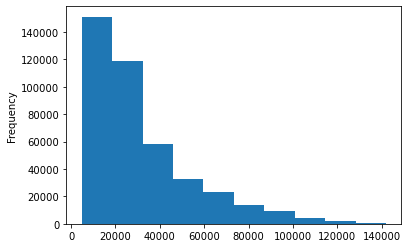

In [5]:
df.SalePrice.plot.hist();

In [6]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

Convert `Saledate` datatype to datetime 

In [7]:
df['saledate'] = pd.to_datetime(df['saledate'])
df['saledate']

#alternate way is to do following
#df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates = ['saledate'])

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

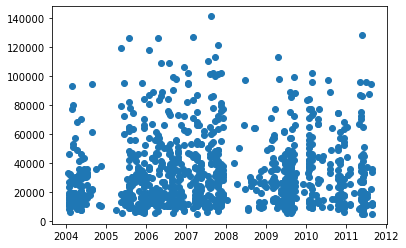

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Transpose first 5 rows to see all 53 columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
# Sort dataframe by SaleDate 
df.sort_values(by=['saledate'], inplace=True,ascending=True)
# if we dont use df, then we have to use: df = df.sort_values(by=['saledate'])
df.saledate.head(10)


205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
#make a copy of original dataframe
df_temp = df.copy()

In [13]:
# Extract day,month,year,day of the week, day of year from sale date and drop saledate column
df['saleyear'] = df.saledate.dt.year
# not sure why, so proceed without: To split data into training and validation

In [14]:
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [15]:
# Find which columns have string datatype
for column, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [16]:
# Convert string into categories
for column, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[column] = content.astype('category').cat.as_ordered()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

#### By converting cell content into categories, we can now access all our data in the form of numbers

In [18]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [19]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Check ratio of missing values wrt dataset

In [20]:
df.isnull().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [21]:
# save to csv

df_temp1 = df.copy()

## Fill numeric missing values

In [22]:
# Find which columns are numeric and print number of missing values
for column, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
            print(column)
            if pd.isnull(content).sum():
                print(f'Columns with missing value is {column}')
            else:
                print('No numeric column with missing value')

SalesID
No numeric column with missing value
SalePrice
No numeric column with missing value
MachineID
No numeric column with missing value
ModelID
No numeric column with missing value
datasource
No numeric column with missing value
auctioneerID
Columns with missing value is auctioneerID
YearMade
No numeric column with missing value
MachineHoursCurrentMeter
Columns with missing value is MachineHoursCurrentMeter
saleyear
No numeric column with missing value


In [23]:
df.auctioneerID.describe()

count    392562.000000
mean          6.585268
std          17.158409
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          99.000000
Name: auctioneerID, dtype: float64

In [24]:
df.MachineHoursCurrentMeter.describe()

count    1.475040e+05
mean     3.522988e+03
std      2.716993e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.209000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

In [25]:
# Fill missing value with median; because mean is affected by outliers in this case
for column, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(f'Columns with missing value is {column}')
                df[column] = content.fillna(content.median())

Columns with missing value is auctioneerID
Columns with missing value is MachineHoursCurrentMeter


## Fill missing categorical values

In [26]:
df.UsageBand.cat.codes.value_counts()

-1    339028
 2     35832
 1     25311
 0     12527
dtype: int64

In [27]:
df.UsageBand.isnull().sum()
#all missing/null values are stored as -1

339028

In [28]:
df.UsageBand.head()

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
Name: UsageBand, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [29]:
df.Steering_Controls.cat.codes.value_counts()

-1    341176
 1     70774
 0       594
 2       139
 4        14
 3         1
dtype: int64

In [30]:
df.Steering_Controls.head()

205615             NaN
274835    Conventional
141296             NaN
212552    Conventional
62755              NaN
Name: Steering_Controls, dtype: category
Categories (5, object): ['Command Control' < 'Conventional' < 'Four Wheel Standard' < 'No' < 'Wheel']

In [31]:
# convert all categorical numbers into numeric

for column, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            #df[column+'is missing'] = pd.isnull(content)
            df[column] = pd.Categorical(content).codes+1

In [32]:
df.UsageBand.head()

205615    0
274835    0
141296    0
212552    0
62755     0
Name: UsageBand, dtype: int8

In [33]:
df.UsageBand.value_counts()

0    339028
3     35832
2     25311
1     12527
Name: UsageBand, dtype: int64

In [34]:
df.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

### Split data into training and validating

In [38]:
df_val = df[df.saleyear == 2012]
df_train = df[df.saleyear != 2012]

len(df_train), len(df_val)


(401125, 11573)

In [39]:
# split data into X & Y
x_train,y_train = df_train.drop('SalePrice',axis=1),df_train.SalePrice
x_val,y_val = df_val.drop('SalePrice',axis=1),df_val.SalePrice

### Evaluation metric
Root mean squared log error

In [40]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    '''
    Calculates root mean squared log error between predictions and true values
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {'Training MAE' : mean_absolute_error(y_train,train_preds),
            'Valid MAE': mean_absolute_error(y_val,val_preds),
            'Training RMSLE': rmsle(y_train,train_preds),
            'Valid RMSLE': rmsle(y_val,val_preds),
            'Training R^2': r2_score(y_train,train_preds),
            'Valid R^2': r2_score(y_val, val_preds)}
    return scores   


### Modelling

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42,max_samples=10000)

In [44]:
#Reducing max samples each estimator can see reduces improves training time
#%%time
model.fit(x_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [45]:
show_scores(model)

{'Training MAE': 5361.027580031161,
 'Valid MAE': 7075.911171692734,
 'Training RMSLE': 0.25100929441210257,
 'Valid RMSLE': 0.2900364027933527,
 'Training R^2': 0.8688465168746909,
 'Valid R^2': 0.8363949692730683}

In [46]:
# experimenting
# model = RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(x_train,y_train)
# show_scores(model)
# signifincat improvement when training full data instead of 10000 samples

{'Training MAE': 1561.3578258148957,
 'Valid MAE': 6149.168384170051,
 'Training RMSLE': 0.08335905565075863,
 'Valid RMSLE': 0.253286757698688,
 'Training R^2': 0.9877948175787151,
 'Valid R^2': 0.8709388599952466}

In [49]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyperparamter tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {'n_estimators': np.arange(10,100,10),
'max_depth': [None,3,5,10],
'min_samples_split':np.arange(2,20,2),
'min_samples_leaf':np.arange(1,20,2),
'max_features': [0.5,1,'sqrt','auto'],
'max_samples':[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
param_distributions=rs_grid,n_iter=2,cv=5,verbose=True)

# Fit model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [52]:
# Find best hyperparameters for our model
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [53]:
# Compare results with baseline model
show_scores(rs_model)
# model performed worse

{'Training MAE': 7138.295974888377,
 'Valid MAE': 8635.974823741852,
 'Training RMSLE': 0.3178150221079536,
 'Valid RMSLE': 0.34367464530246405,
 'Training R^2': 0.7806542808725913,
 'Valid R^2': 0.7601928872233206}

In [54]:
# Now make n_iters = 100
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {'n_estimators': np.arange(10,100,10),
'max_depth': [None,3,5,10],
'min_samples_split':np.arange(2,20,2),
'min_samples_leaf':np.arange(1,20,2),
'max_features': [0.5,1,'sqrt','auto'],
'max_samples':[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
param_distributions=rs_grid,n_iter=100,cv=5,verbose=True)

# Fit model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [56]:
show_scores(rs_model)
#so even after many iterations, we dont get good results because of 10000 samples
# as result with more data is for more accurate

{'Training MAE': 5529.588311489871,
 'Valid MAE': 7263.787970808316,
 'Training RMSLE': 0.25696722799145305,
 'Valid RMSLE': 0.29659163992264065,
 'Training R^2': 0.8603888025457316,
 'Valid R^2': 0.828393728179434}

In [62]:
ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,
min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None,random_state=42)

ideal_model.fit(x_train,y_train)
show_scores(ideal_model)

{'Training MAE': 2966.962096612195,
 'Valid MAE': 5950.160594343015,
 'Training RMSLE': 0.14533519528683098,
 'Valid RMSLE': 0.2439643960801849,
 'Training R^2': 0.9586232992666398,
 'Valid R^2': 0.8808579299937861}

#### Make predictions on test data

In [64]:
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


* We cannot directly predict on test dataset without doing the following
* Fill missing values
* Convert string into categorical, and later into numeric types like we did for training data

### Preprocess test dataset
* A custom function which will preprocess the new data to be used for testing

In [68]:
def preprocess_data(data):
    '''
    Performs transformations on data
    '''
    # We only needed this to split training data, but test data should have same columns, so add this in test data
    data['saleyear'] = data.saledate.dt.year 

    # Fill numeric data with median
    for column, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[column] = content.fillna(content.median())
    # Convert string into categorical
    for column, content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[column] = content.astype('category').cat.as_ordered()

    # Convert categorical missing data into numbers
        if not pd.api.types.is_numeric_dtype(content):
            data[column] = pd.Categorical(content).codes+1
    return data


In [69]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   saledate                  12457 non-null  int16  
 9   fiModelDesc               12457 non-null  int16  
 10  fiBaseModel               12457 non-null  int16  
 11  fiSecondaryDesc           12457 non-null  int8   
 12  fiModelSeries             12457 non-null  int8   
 13  fiModelDescriptor         12457 non-null  int8   
 14  Produc

In [70]:
test_preds = ideal_model.predict(df_test)

In [73]:
# format predictions in same format as required by kaggle
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,25722.325916
1,1227844,19581.885722
2,1227847,73501.758211
3,1227848,70388.073568
4,1227863,66937.925510
...,...,...
12452,6643171,47849.685719
12453,6643173,16871.945614
12454,6643184,18809.140301
12455,6643186,19889.225165


In [74]:
# export to csv
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv',index=False)


#### Feature Importance

In [75]:
len(ideal_model.feature_importances_)

53

In [76]:
x_train.shape

(401125, 53)

In [77]:
def plot_features(columns,importances,n=20):
    data = (pd.DataFrame({'features':columns,'feature_importances':importances})
    .sort_values('feature_importances',ascending=False).reset_index(drop=True))

    fig, ax = plt.subplots()
    ax.barh(data['features'][:n], data['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

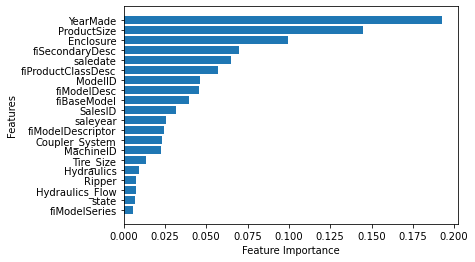

In [78]:
plot_features(x_train.columns, ideal_model.feature_importances_)